# Some Tips for JupyterNotebook : 

-Scroll up and down your cells with your Up and Down keys.

-Press A or B to insert a new cell above or below the active cell.

-M will transform the active cell to a Markdown cell.

-Y will set the active cell to a code cell.

-D + D (D twice) will delete the active cell.

-Z will undo cell deletion.

-Hold Shift and press Up or Down to select multiple cells at once. With multiple cells selected, Shift + M will merge your selection.

# Some tests for text and running code 


In [ ]:
print("hello world !")

In [ ]:
x = 3
for i in range(0, 5):
    print(i + x) 

Salut text intermediaire 

In [ ]:
import time 
time.sleep(3)

Salut 

Je tape ce texte pour tester le Markdown 

Ca marche bien !

In [ ]:
string = "Bonjour comment ca va ? "
print(string)

# Algorithm(s) (test) not used for the app 


In [ ]:
max_score = 10
min_score = 0
critical = 0

def input_score(string, list_input):
    score = int(input("Rentrez votre " + string + "\t"))
    list_input.append(score)
    return score

# max_score_is_bad is a boolean
def find_factor(score,name, epsilon, max_score_is_bad):
    if (max_score_is_bad): 
        if (abs(max_score - score) < epsilon):
            print(name + " est un facteur important du modele")
    else :
        if (score < epsilon):
            print(name + " est un facteur important du modele")


input_list = []
age     = input_score("age", input_list)
fatigue = input_score("fatigue", input_list)
douleur = input_score("douleur", input_list)
sommeil = input_score("sommeil", input_list)

del input_list[0] # we don t consider the age as an input for this time 
    
print(input_list)

# 1st exemple 
if ((max_score - fatigue) < 2 or sommeil < 2 or (max_score - douleur) < 2):
    critical = 1
    print("You should try to do this or that ")
elif (fatigue > 2 and fatigue < 5):
    print("Keep going it s better")
else : 
    print("Great job you seems to be good ! ")
    
# 2nd exemple 
for score in input_list:
    if score < 2:
        critical = 1
        print("You should try to do this or that #2")
        
        
        
# do the correlation between the age and the (back) pain for example
if (douleur > 7):
    if (age > 60):
        print("Try to stretch yourself ")
    else:
        print("Change your position when you are working or whatever")

find_factor(fatigue, "fatigue", 2, 1)
find_factor(douleur, "douleur", 2, 1)
find_factor(sommeil, "sommeil", 2, 0)

# CLUSTER TEST ON DATASET

# CREATE THE DATASET 

In [2]:
import numpy as np
import pandas as pd
import names
import gender_guesser.detector as gender


#defining a seed

np.random.seed(42) # extract always the same sample

detector = gender.Detector()

#generating first col
names_col = [names.get_first_name() for i in range(800)]

#names
df = pd.DataFrame(data=names_col,
                columns=["name"])

sexe_col = [0 if (detector.get_gender(names_col[i]) == "male" or detector.get_gender(names_col[i]) == "mostly_male")
            else 1 for i in range(800)]

#sexes
df1 = pd.DataFrame(data=sexe_col,
                  columns=["sexe"])

#age 
df2 = pd.DataFrame(np.random.randint(15, 90, size=800),
                  columns=["age"])

#health
df3 = pd.DataFrame(np.random.randint(0, 11, size=800),
                  columns=["general health"]) 

#activity
df4 = pd.DataFrame(np.random.randint(0, 11, size=800),
                  columns=["ease of activity"])

#breath
df5 = pd.DataFrame(np.random.randint(0, 11, size=800),
                  columns=["breathing problem"])

#fatigue 
df6 = pd.DataFrame(np.random.randint(0, 11, size=800),
                  columns=["fatigue"])

#pain
df7 = pd.DataFrame(np.random.randint(0, 11, size=800),
                  columns=["overall pain"])

#concentration
df8 = pd.DataFrame(np.random.randint(0, 11, size=800),
                  columns=["concentration"])

#sleep
df9 = pd.DataFrame(np.random.randint(0, 11, size=800),
                  columns=["sleep quality"])

df = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8, df9], axis=1)


final_tab = df


final_tab=df[["name", "sexe", "age", "general health", 
              "ease of activity", "breathing problem", "fatigue", "overall pain", "concentration", "sleep quality"]]


X = final_tab.sample(frac=1)
X.sample(frac=1).to_csv("test1.csv",index=False)

In [3]:
file = pd.read_csv("test1.csv")
file.head(20)

,name,sexe,age,general health,ease of activity,breathing problem,fatigue,overall pain,concentration,sleep quality
0,Tracey,1,76,0,3,3,2,9,2,10
1,Lorenzo,0,75,9,7,3,0,3,6,7
2,Brandon,0,84,8,3,3,7,7,10,6
3,Steve,0,68,5,1,5,3,9,8,8
4,Marie,1,15,4,3,2,0,5,4,4
5,Kelly,1,16,4,5,0,0,6,7,7
6,Sheryl,1,65,9,6,2,4,0,9,6
7,Alison,1,77,1,9,4,6,9,9,7
8,Aleshia,1,26,10,2,7,1,10,3,6
9,Mary,1,74,4,9,5,2,10,3,0


# USING FORMULA FOR SEVERITY SCORE 

# Output the severity score for each person 


In [4]:
# to calculate the severity score the formula is :
# 50%(fatigue)+15%(10–mood) + 15%(10–ease of activity) + 20%(10–general health)

#the mood of the formula is in this example the sleep quality 
severity=[]
for i in df.index:
    severity_score = 50/100 * df["fatigue"][i] + 15/100 * (10 - df["sleep quality"][i]) + 15/100 * (10 - df["ease of activity"][i]) + 20/100 * (10 - df["general health"][i])
    severity.append(severity_score)
    
df_severity = pd.DataFrame(data=severity, columns=["severity score"])

df = pd.concat([df, df_severity], axis=1)

final_tab = df


final_tab=df[["name", "sexe", "age", "general health", 
              "ease of activity", "breathing problem", "fatigue", "overall pain", "concentration", "sleep quality", "severity score"]]


X = final_tab.sample(frac=1)
X.sample(frac=1).to_csv("test1_severity_score.csv",index=False)

file = pd.read_csv("test1_severity_score.csv")
file.head(20)

,name,sexe,age,general health,ease of activity,breathing problem,fatigue,overall pain,concentration,sleep quality,severity score
0,Christopher,0,47,3,10,9,4,2,10,2,4.60
1,Michael,0,85,7,2,3,1,10,5,8,2.60
2,Mary,1,23,7,9,9,9,6,1,6,5.85
3,Florence,1,61,0,0,4,9,0,5,9,8.15
4,John,0,83,9,3,0,1,2,8,8,2.05
5,Bruce,0,87,0,8,6,3,4,10,9,3.95
6,Bruce,0,66,4,9,0,0,2,5,5,2.10
7,Lesley,1,59,6,5,8,7,4,3,1,6.40
8,Tina,1,46,4,10,7,1,4,6,9,1.85
9,Robert,0,78,2,5,3,4,1,5,7,4.80


# CONSIDER THAT WE HAVE 50 DAYS OF SERVERITY SCORE FOR ONE USER AND WE TRY TO PREDICT IT

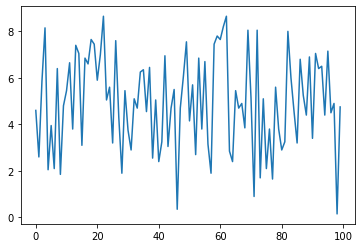

Test RMSE: 2.168


/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


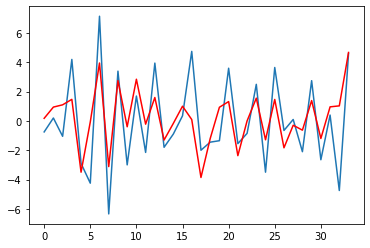

Prediction: 7.326933


In [5]:
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoRegResults


# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return np.array(diff)
 
# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat

ss = file["severity score"].head(100)
ss.plot() 
pyplot.show()

X = difference(ss.values)

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
# train autoregression
window_size = 6
model = AutoReg(train, lags=6)
model_fit = model.fit()

# save coefficients
coef = model_fit.params
np.save('man_model.npy', coef)
# save lag
lag = X[-window_size:]
np.save('man_data.npy', lag)
# save the last ob
np.save('man_obs.npy', [ss.values[-1]])


# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


# load model
model = AutoRegResults.load('ar_model.pkl')
data = np.load('ar_data.npy')
last_ob = np.load('ar_obs.npy')
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)


# TRY PREDICTION OF SS USING FAMOUS EXAMPLE "HOUSE PRICE PREDICTION"
    

In [97]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

In [98]:
#generating first col
names_col = ["Alice", "Bob", "Emma", "Paul", "Francoise", "Stef", "Daniela", "Antoine", "Julie", "Patrick"]

#names
df = pd.DataFrame(data=names_col,
                columns=["name"])

sexe_col = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

#sexes
df1 = pd.DataFrame(data=sexe_col,
                  columns=["sexe"])

#age 
age =    [24, 19, 64, 59, 75, 60, 25, 50, 70, 83]
df2 = pd.DataFrame(data=age, 
                  columns=["age"])

#health
health =  [8, 9, 6, 7, 5, 5, 8, 6, 4, 3]
df3 = pd.DataFrame(data=health,
                  columns=["general health"]) 

#activity
activity= [3, 10, 3, 7, 3, 1, 8, 5, 6, 0]
df4 = pd.DataFrame(data=activity,
                  columns=["ease of activity"])

#breath
breath=   [2, 1, 3, 3, 8, 6, 0, 4, 5, 10]
df5 = pd.DataFrame(data=breath,
                  columns=["breathing problem"])

#fatigue 
fatigue = [0, 1, 3, 3, 8, 6, 1, 4, 8, 10]
df6 = pd.DataFrame(data=fatigue,
                  columns=["fatigue"])

#pain
pain =    [3, 2, 8, 3, 4, 3, 1, 3, 8, 9]
df7 = pd.DataFrame(data=pain,
                  columns=["overall pain"])

#concentration
concentr= [2, 7, 7, 6, 3, 5, 10, 7, 3, 2]
df8 = pd.DataFrame(data=concentr,
                  columns=["concentration"])

#sleep
sleep =   [10, 8, 9, 4, 9, 5, 9, 8, 5, 4]
df9 = pd.DataFrame(data=sleep,
                  columns=["sleep quality"])

df = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8, df9], axis=1)

severity=[]
for i in df.index:
    severity_score = 50/100 * df["fatigue"][i] + 15/100 * (10 - df["sleep quality"][i]) + 15/100 * (10 - df["ease of activity"][i]) + 20/100 * (10 - df["general health"][i])
    severity.append(severity_score)
    
df_severity = pd.DataFrame(data=severity, columns=["severity score"])

df = pd.concat([df, df_severity], axis=1)

final_tab = df

final_tab=df[["name", "sexe", "age", "general health", 
              "ease of activity", "breathing problem", "fatigue", "overall pain", "concentration", "sleep quality", "severity score"]]


X = final_tab.sample(frac=1)
X.sample(frac=1).to_csv("test2_handmade.csv",index=False)

df = pd.read_csv("test2_handmade.csv", 
                 usecols=["sexe", "age", "general health", "ease of activity",
                          "breathing problem", "fatigue", "overall pain", 
                          "concentration", "sleep quality", "severity score"])

df.head(10)

,sexe,age,general health,ease of activity,breathing problem,fatigue,overall pain,concentration,sleep quality,severity score
0,1,25,8,8,0,1,1,10,9,1.35
1,0,59,7,7,3,3,3,6,4,3.45
2,0,50,6,5,4,4,3,7,8,3.85
3,1,70,4,6,5,8,8,3,5,6.55
4,0,83,3,0,10,10,9,2,4,8.80
5,1,24,8,3,2,0,3,2,10,1.45
6,0,19,9,10,1,1,2,7,8,1.00
7,1,64,6,3,3,3,8,7,9,3.50
8,1,75,5,3,8,8,4,3,9,6.20
9,0,60,5,1,6,6,3,5,5,6.10


In [99]:
df.dropna(inplace=True)

print(df.isnull().sum())

sexe                 0
age                  0
general health       0
ease of activity     0
breathing problem    0
fatigue              0
overall pain         0
concentration        0
sleep quality        0
severity score       0
dtype: int64


In [100]:
df.describe()

,sexe,age,general health,ease of activity,breathing problem,fatigue,overall pain,concentration,sleep quality,severity score
count,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
mean,0.500000,52.90000,6.100000,4.600000,4.200000,4.400000,4.400000,5.20000,7.100000,4.225000
std,0.527046,22.77645,1.911951,3.169297,3.119829,3.438346,2.836273,2.65832,2.330951,2.611646
min,0.000000,19.00000,3.000000,0.000000,0.000000,0.000000,1.000000,2.00000,4.000000,1.000000
25%,0.000000,31.25000,5.000000,3.000000,2.250000,1.500000,3.000000,3.00000,5.000000,1.950000
50%,0.500000,59.50000,6.000000,4.000000,3.500000,3.500000,3.000000,5.50000,8.000000,3.675000
75%,1.000000,68.50000,7.750000,6.750000,5.750000,7.500000,7.000000,7.00000,9.000000,6.175000
max,1.000000,83.00000,9.000000,10.000000,10.000000,10.000000,9.000000,10.00000,10.000000,8.800000


In [101]:
df['severity score'] = pd.to_numeric(df['severity score'], errors = 'coerce')
df["severity score"] = df["severity score"].astype('int64')

<AxesSubplot:>

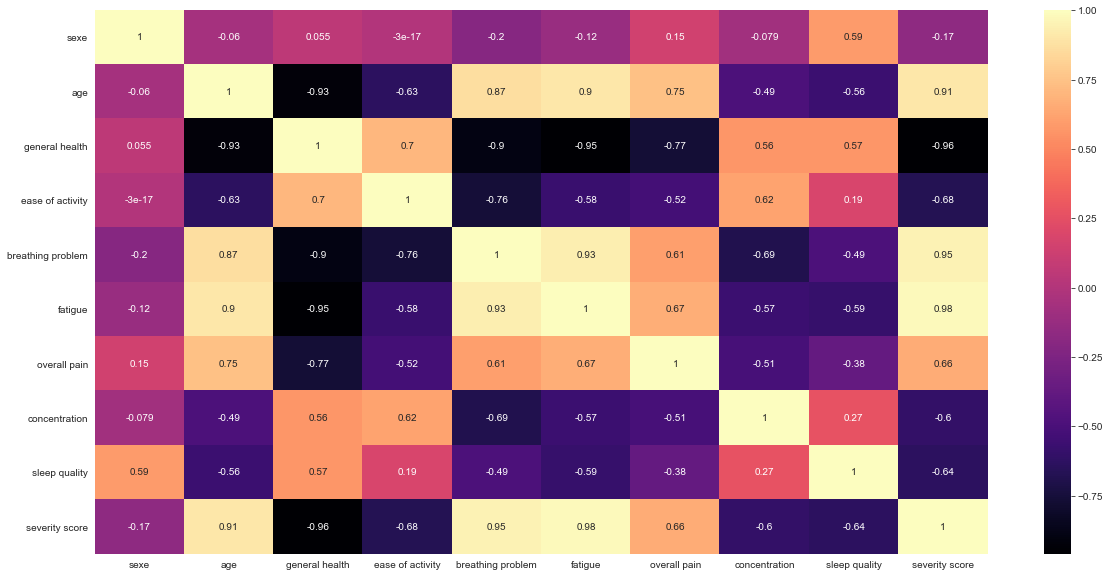

In [102]:
sb.heatmap(df.corr(), annot=True, cmap="magma")

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


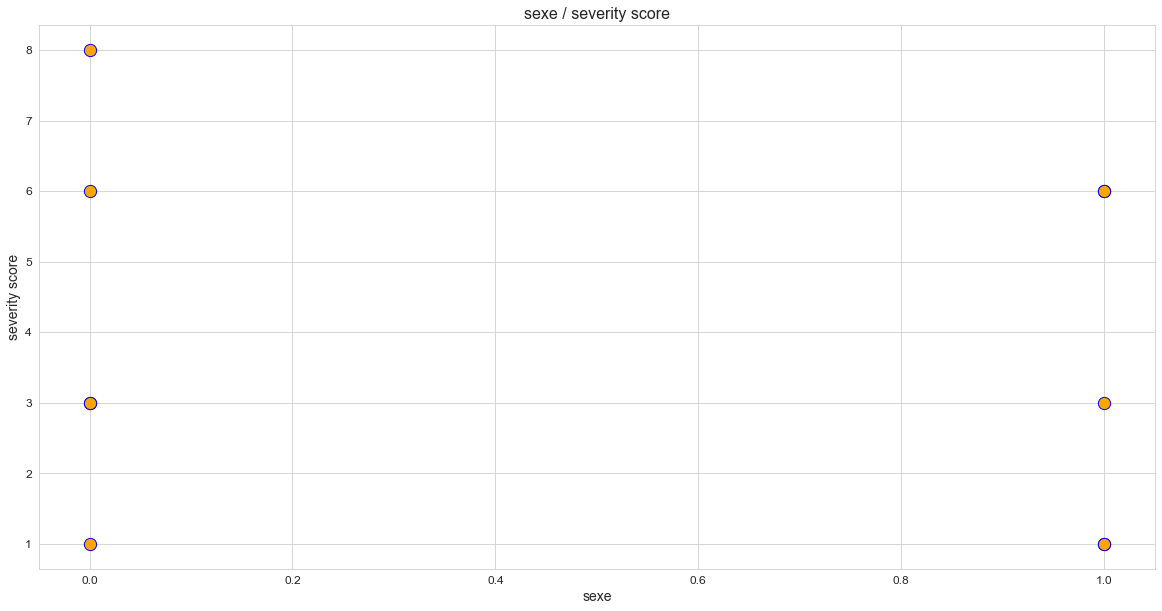

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


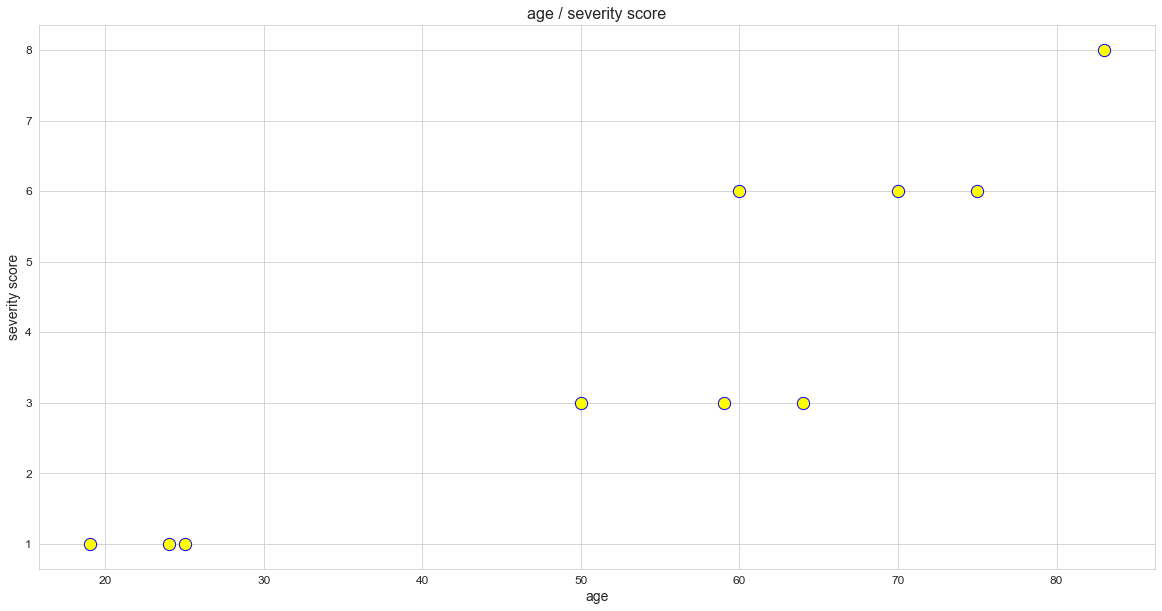

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


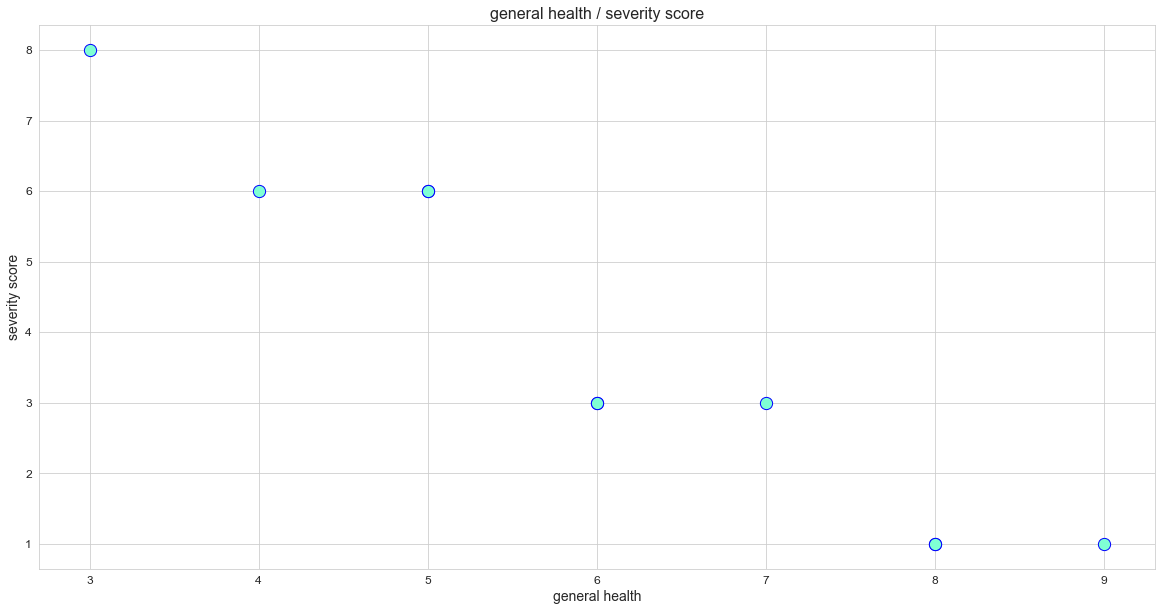

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


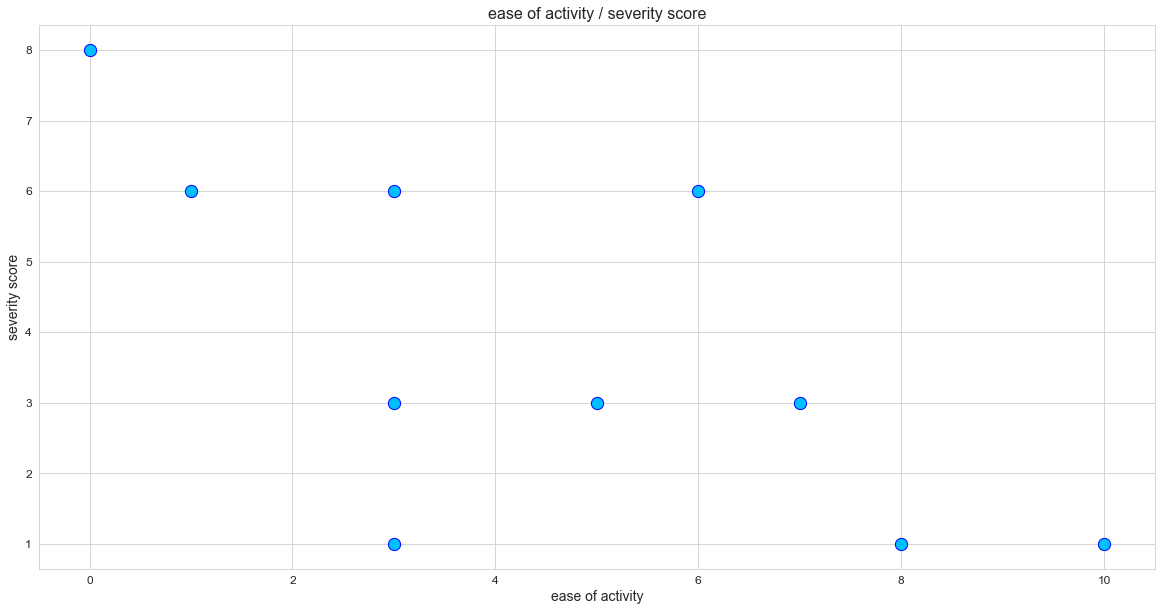

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


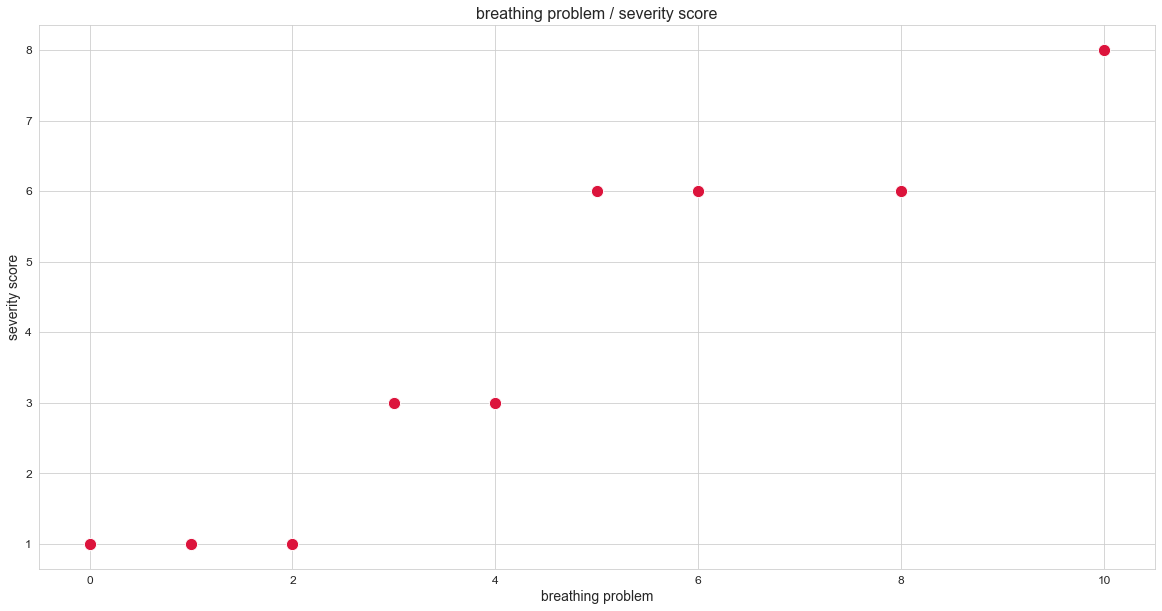

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


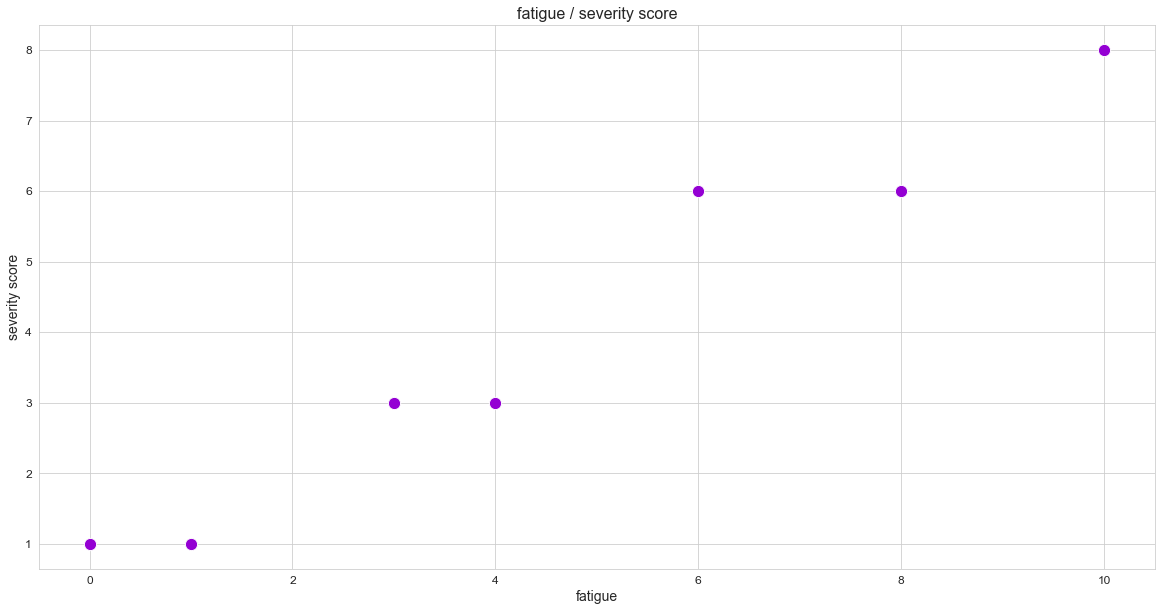

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


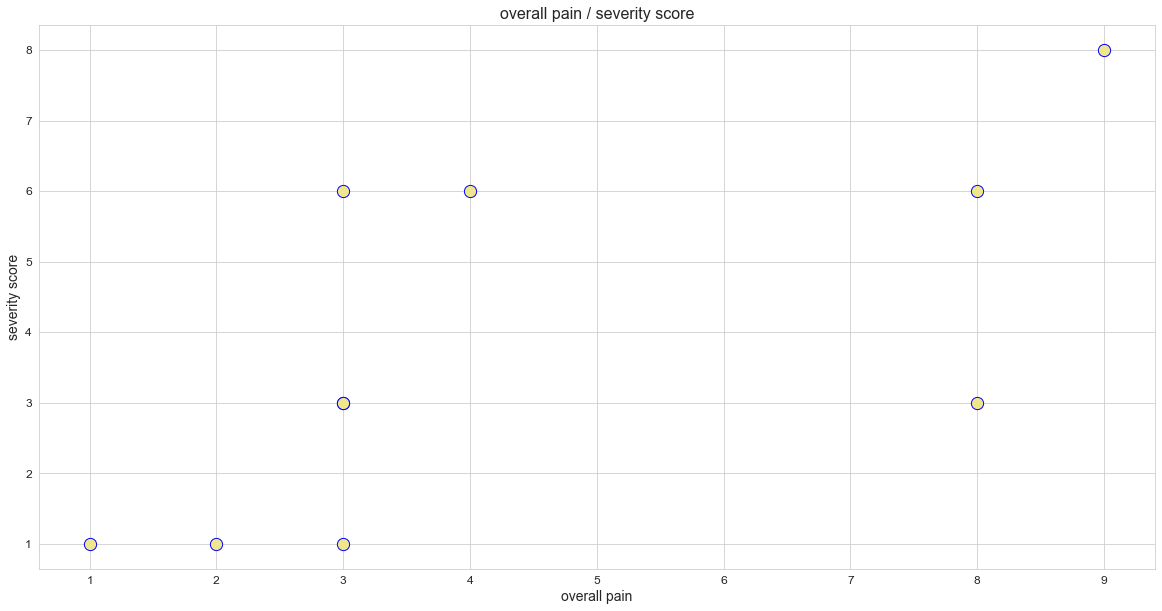

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


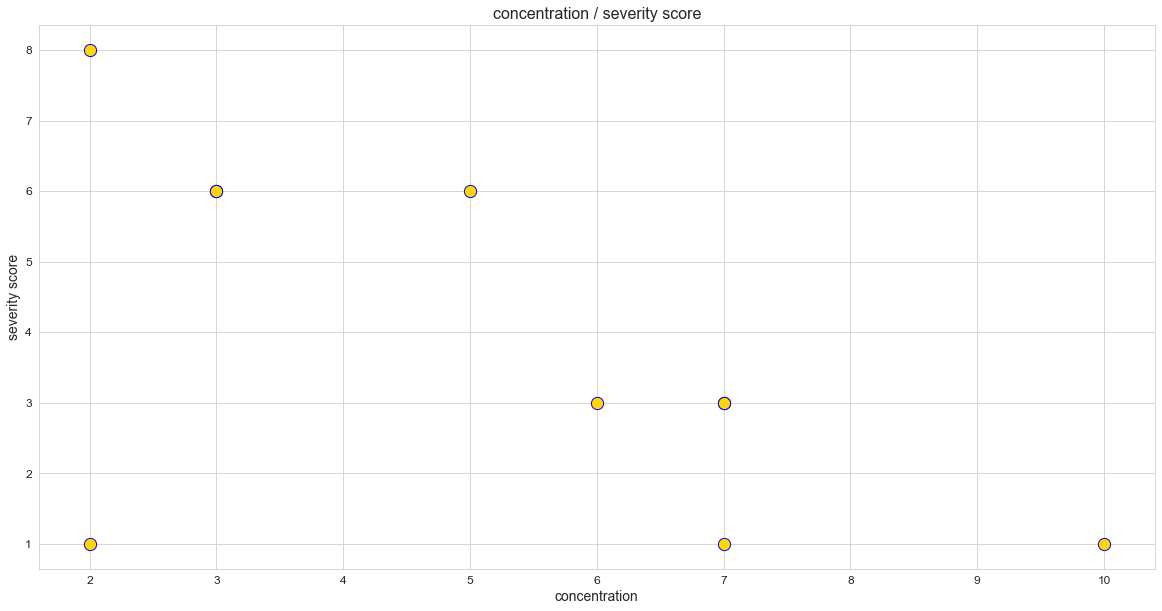

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


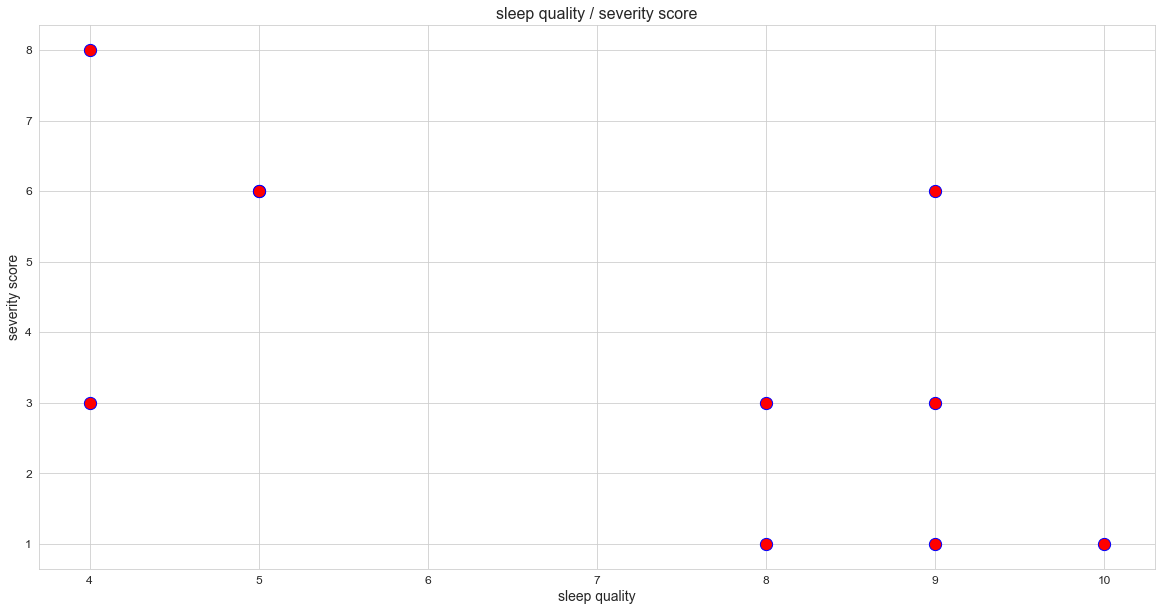

In [103]:
def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    plot1 = sb.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} / severity score'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('severity score', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} / severity score'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('severity score', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
    plot3 = sb.scatterplot(i[2], y_var, data = df, color = 'aquamarine', edgecolor = 'b', s = 150)
    plt.title('{} / severity score'.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('severity score', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter3.png')
    plt.show()
    
    plot4 = sb.scatterplot(i[3], y_var, data = df, color = 'deepskyblue', edgecolor = 'b', s = 150)
    plt.title('{} / severity score'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('severity score', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter4.png')
    plt.show()
    
    plot5 = sb.scatterplot(i[4], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} / severity score'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('severity score', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    plot6 = sb.scatterplot(i[5], y_var, data = df, color = 'darkviolet', edgecolor = 'white', s = 150)
    plt.title('{} / severity score'.format(i[5]), fontsize = 16)
    plt.xlabel('{}'.format(i[5]), fontsize = 14)
    plt.ylabel('severity score', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter6.png')
    plt.show()
    
    plot7 = sb.scatterplot(i[6], y_var, data = df, color = 'khaki', edgecolor = 'b', s = 150)
    plt.title('{} / severity score'.format(i[6]), fontsize = 16)
    plt.xlabel('{}'.format(i[6]), fontsize = 14)
    plt.ylabel('severity score', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter7.png')
    plt.show()
    
    plot8 = sb.scatterplot(i[7], y_var, data = df, color = 'gold', edgecolor = 'b', s = 150)
    plt.title('{} / severity score'.format(i[7]), fontsize = 16)
    plt.xlabel('{}'.format(i[7]), fontsize = 14)
    plt.ylabel('severity score', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter8.png')
    plt.show()
    
    plot9 = sb.scatterplot(i[8], y_var, data = df, color = 'r', edgecolor = 'b', s = 150)
    plt.title('{} / severity score'.format(i[8]), fontsize = 16)
    plt.xlabel('{}'.format(i[8]), fontsize = 14)
    plt.ylabel('severity score', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter9.png')
    plt.show()
    
    
scatter_df("severity score")

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


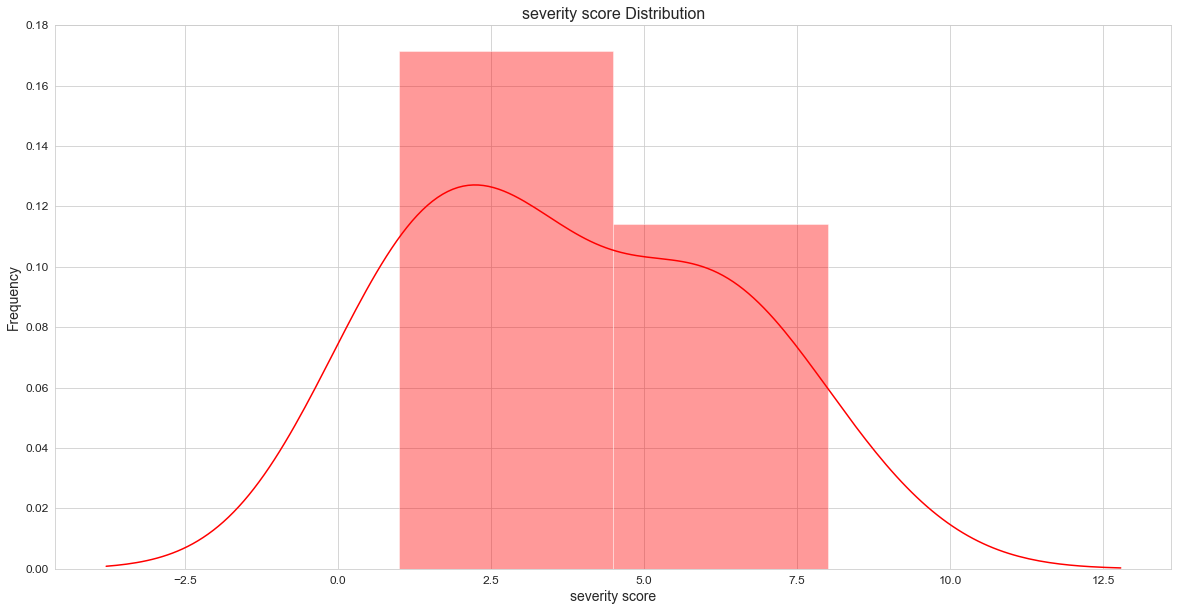

In [104]:
sb.distplot(df['severity score'], color = 'r')
plt.title('severity score Distribution', fontsize = 16)
plt.xlabel('severity score', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()